In [1]:
import sys
sys.path.append('../')

from FeatureModels import *
from sklearn.ensemble import RandomForestRegressor

In [2]:
%load_ext autoreload

In [3]:
%autoreload 2 

In [4]:
sensor = 's'
fill = '_fill'

district = 'Mean'

#savePath = 'Results/Results RF large periods.xlsx'

In [5]:
params = { 
    'n_estimators': np.linspace(1, 1000, 5).round().astype('int'),
    'max_features': np.linspace(0.1, 1, 5)
}
params

{'n_estimators': array([   1,  251,  500,  750, 1000]),
 'max_features': array([0.1  , 0.325, 0.55 , 0.775, 1.   ])}

## Модели, обученные за года

In [6]:
model = RandomForestRegressor(random_state = 100)

Пропуски в Wind_dir : 1
Пропуски в Wind_speed : 1


,Train,Valid,Test
"2020-01-01 — 2023-03-22 {'max_features': 0.325, 'n_estimators': 1000}",,,
MSE,27.6447,192.4803,382.9879
MAE,3.0932,7.8409,14.4392
MAPE,0.2063,0.5375,0.4875
R2,0.9656,0.7901,0.7121


100%|██████████████████████████████████████████████████████████████████████████████████| 11/11 [00:27<00:00,  2.50s/it]


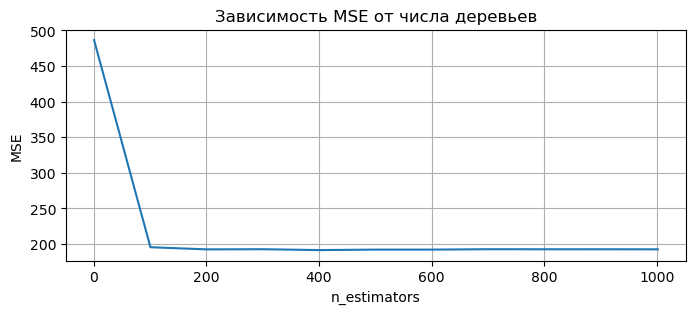

100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:47<00:00,  4.77s/it]


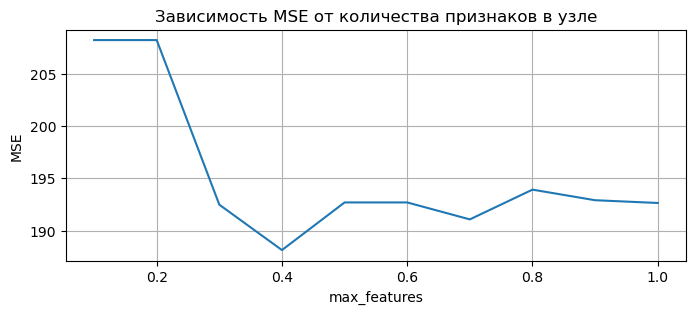

Пропуски в Wind_dir : 1
Пропуски в Wind_speed : 1


,Train,Valid,Test
"2020-01-01 — 2023-03-22 {'max_features': 0.55, 'n_estimators': 750}",,,
MSE,27.9881,244.9022,46.6978
MAE,3.0731,8.6870,5.3595
MAPE,0.2015,0.4806,0.4198
R2,0.9627,0.7953,0.5153


100%|██████████████████████████████████████████████████████████████████████████████████| 11/11 [00:22<00:00,  2.08s/it]


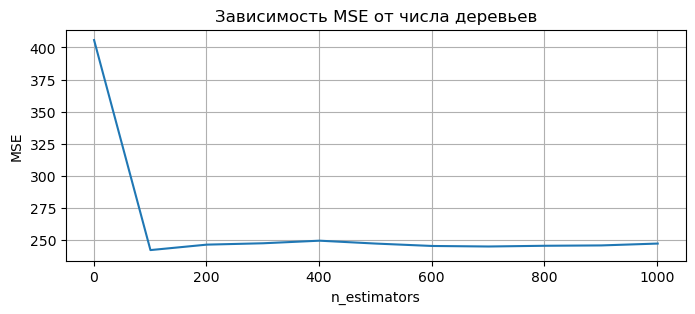

100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [01:03<00:00,  6.31s/it]


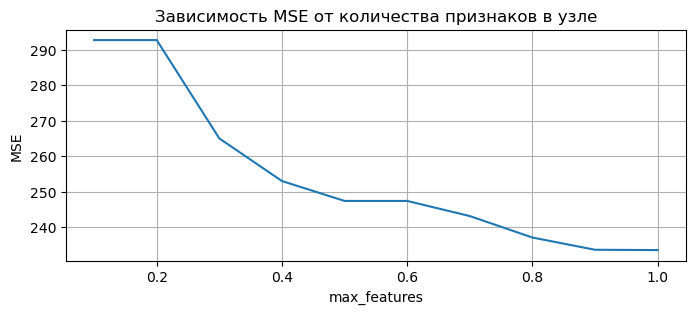

Пропуски в Wind_dir : 1
Пропуски в Wind_speed : 1


,Train,Valid,Test
"2020-01-01 — 2023-03-22 {'max_features': 0.55, 'n_estimators': 1000}",,,
MSE,30.3169,193.2338,42.6540
MAE,3.2031,8.0789,5.0839
MAPE,0.2048,0.5464,0.6891
R2,0.9655,0.7836,0.1246


100%|██████████████████████████████████████████████████████████████████████████████████| 11/11 [00:34<00:00,  3.13s/it]


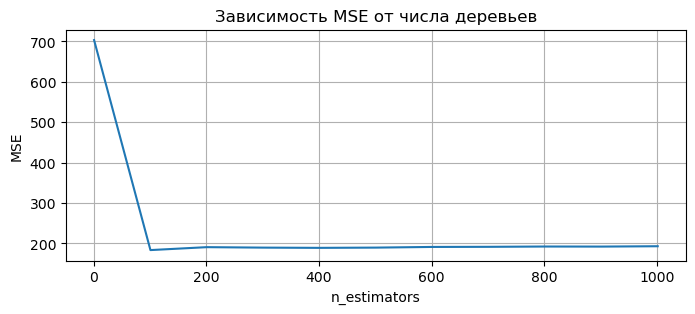

100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:53<00:00,  5.39s/it]


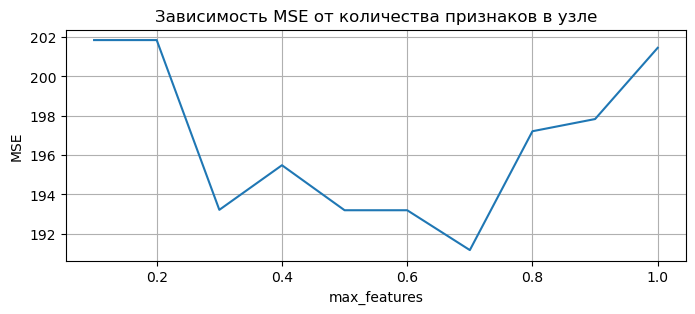

Пропуски в Wind_dir : 1
Пропуски в Wind_speed : 1


,Train,Valid,Test
"2020-01-01 — 2023-03-22 {'max_features': 0.55, 'n_estimators': 500}",,,
MSE,29.4894,194.3473,31.8114
MAE,3.1003,8.3438,4.4389
MAPE,0.1982,0.5574,0.6498
R2,0.9655,0.7950,0.2861


100%|██████████████████████████████████████████████████████████████████████████████████| 11/11 [00:33<00:00,  3.07s/it]


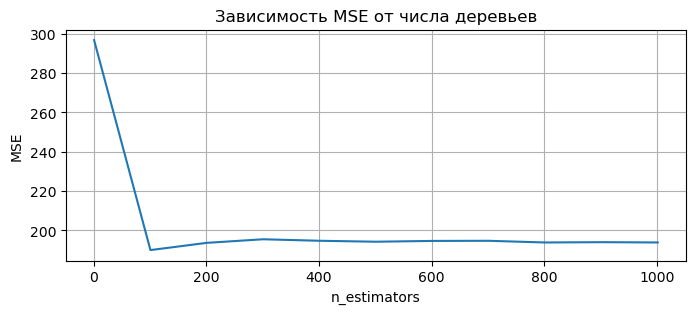

100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [01:06<00:00,  6.62s/it]


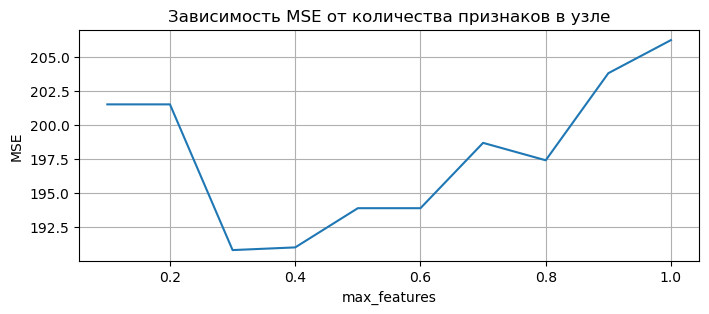

In [7]:
# Срез данных от begin до end
begin, end = '2020-01-01', '2023-04-06'

for season in ['winters', 'springs', 'summers', 'autumns']:
    test_index = pd.read_csv(f"../data/test_index.csv", sep = ';', dayfirst=True, parse_dates = [season])[season].values
    ModelProcessing(model, sensor, fill, district, begin, end, season = '', test_index = test_index, params = params, gridSearch = True, paramDependencies = True, plotRes = False, featImp = False)

## Сезонные модели

In [8]:
begin, end = '2019-01-01', '2023-04-06'

for season in ['winters', 'springs', 'summers', 'autumns']:
    test_index = pd.read_csv(f"../data/test_index.csv", sep = ';', dayfirst=True, parse_dates = [season])[season].values
    ModelProcessing(model, sensor, fill, district, begin, end, season = season, test_index = test_index, params = params, gridSearch = True, paramDependencies = False, plotRes = False, featImp = False)

Пропуски в Wind_dir : 1
Пропуски в Wind_speed : 1


,Train,Valid,Test
"2019-01-01 — 2023-03-22 {'max_features': 0.775, 'n_estimators': 251}",,,
MSE,71.5611,805.9224,469.2674
MAE,5.7582,17.9763,15.8172
MAPE,0.1760,0.3964,0.4684
R2,0.9647,0.6048,0.6473


Пропуски в Wind_dir : 1
Пропуски в Wind_speed : 1


,Train,Valid,Test
"2019-01-01 — 2023-03-22 {'max_features': 0.55, 'n_estimators': 750}",,,
MSE,6.4544,40.0778,43.4523
MAE,1.8871,4.8270,4.6855
MAPE,0.1596,0.3523,0.3796
R2,0.9486,0.6333,0.5490


Пропуски в Wind_dir : 1
Пропуски в Wind_speed : 1


,Train,Valid,Test
"2019-01-01 — 2023-03-22 {'max_features': 0.1, 'n_estimators': 251}",,,
MSE,4.3496,17.6139,25.9594
MAE,1.3293,3.4034,3.9827
MAPE,0.1744,0.5473,0.5100
R2,0.8916,0.2094,0.4672


Пропуски в Wind_dir : 1
Пропуски в Wind_speed : 1


,Train,Valid,Test
"2019-01-01 — 2023-03-22 {'max_features': 0.775, 'n_estimators': 1000}",,,
MSE,3.2351,32.0936,30.2402
MAE,1.3401,3.7858,4.2676
MAPE,0.1727,0.4234,0.6449
R2,0.9514,0.3010,0.3214
